# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [ ]:


# librerías 
# pandas, numpy, matplotlib.pyplot, seaborn

# PCA, StandardScaler, Pipeline, SelectKBest, train_test_split, GridSearchCV
# RandomForestClassifier
# accuracy, confusion matrix


### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [ ]:

# df leído de data/comprar_alquilar.csv

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [ ]:
# info del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [ ]:
# describe del df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [ ]:

# value_counts de la columna 'comprar' del dataframe

comprar
0    135
1     67
Name: count, dtype: int64

In [ ]:

# value_counts de estado_civil

estado_civil
2    73
0    68
1    61
Name: count, dtype: int64

In [ ]:

# value_counts de 'trabajo'

trabajo
5    31
8    29
7    27
6    23
3    21
4    19
2    18
1    18
0    16
Name: count, dtype: int64

In [ ]:

# agrupo por 'trabajo', selecciono 'ingresos' y calculo la media

trabajo
0    5393.750000
1    4665.666667
2    4533.166667
3    5341.761905
4    5109.368421
5    5139.032258
6    4940.391304
7    4704.148148
8    4849.379310
Name: ingresos, dtype: float64

In [ ]:

# calculo la correlación de pearson

,trabajo,ingresos
trabajo,1.000000,-0.038852
ingresos,-0.038852,1.000000


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

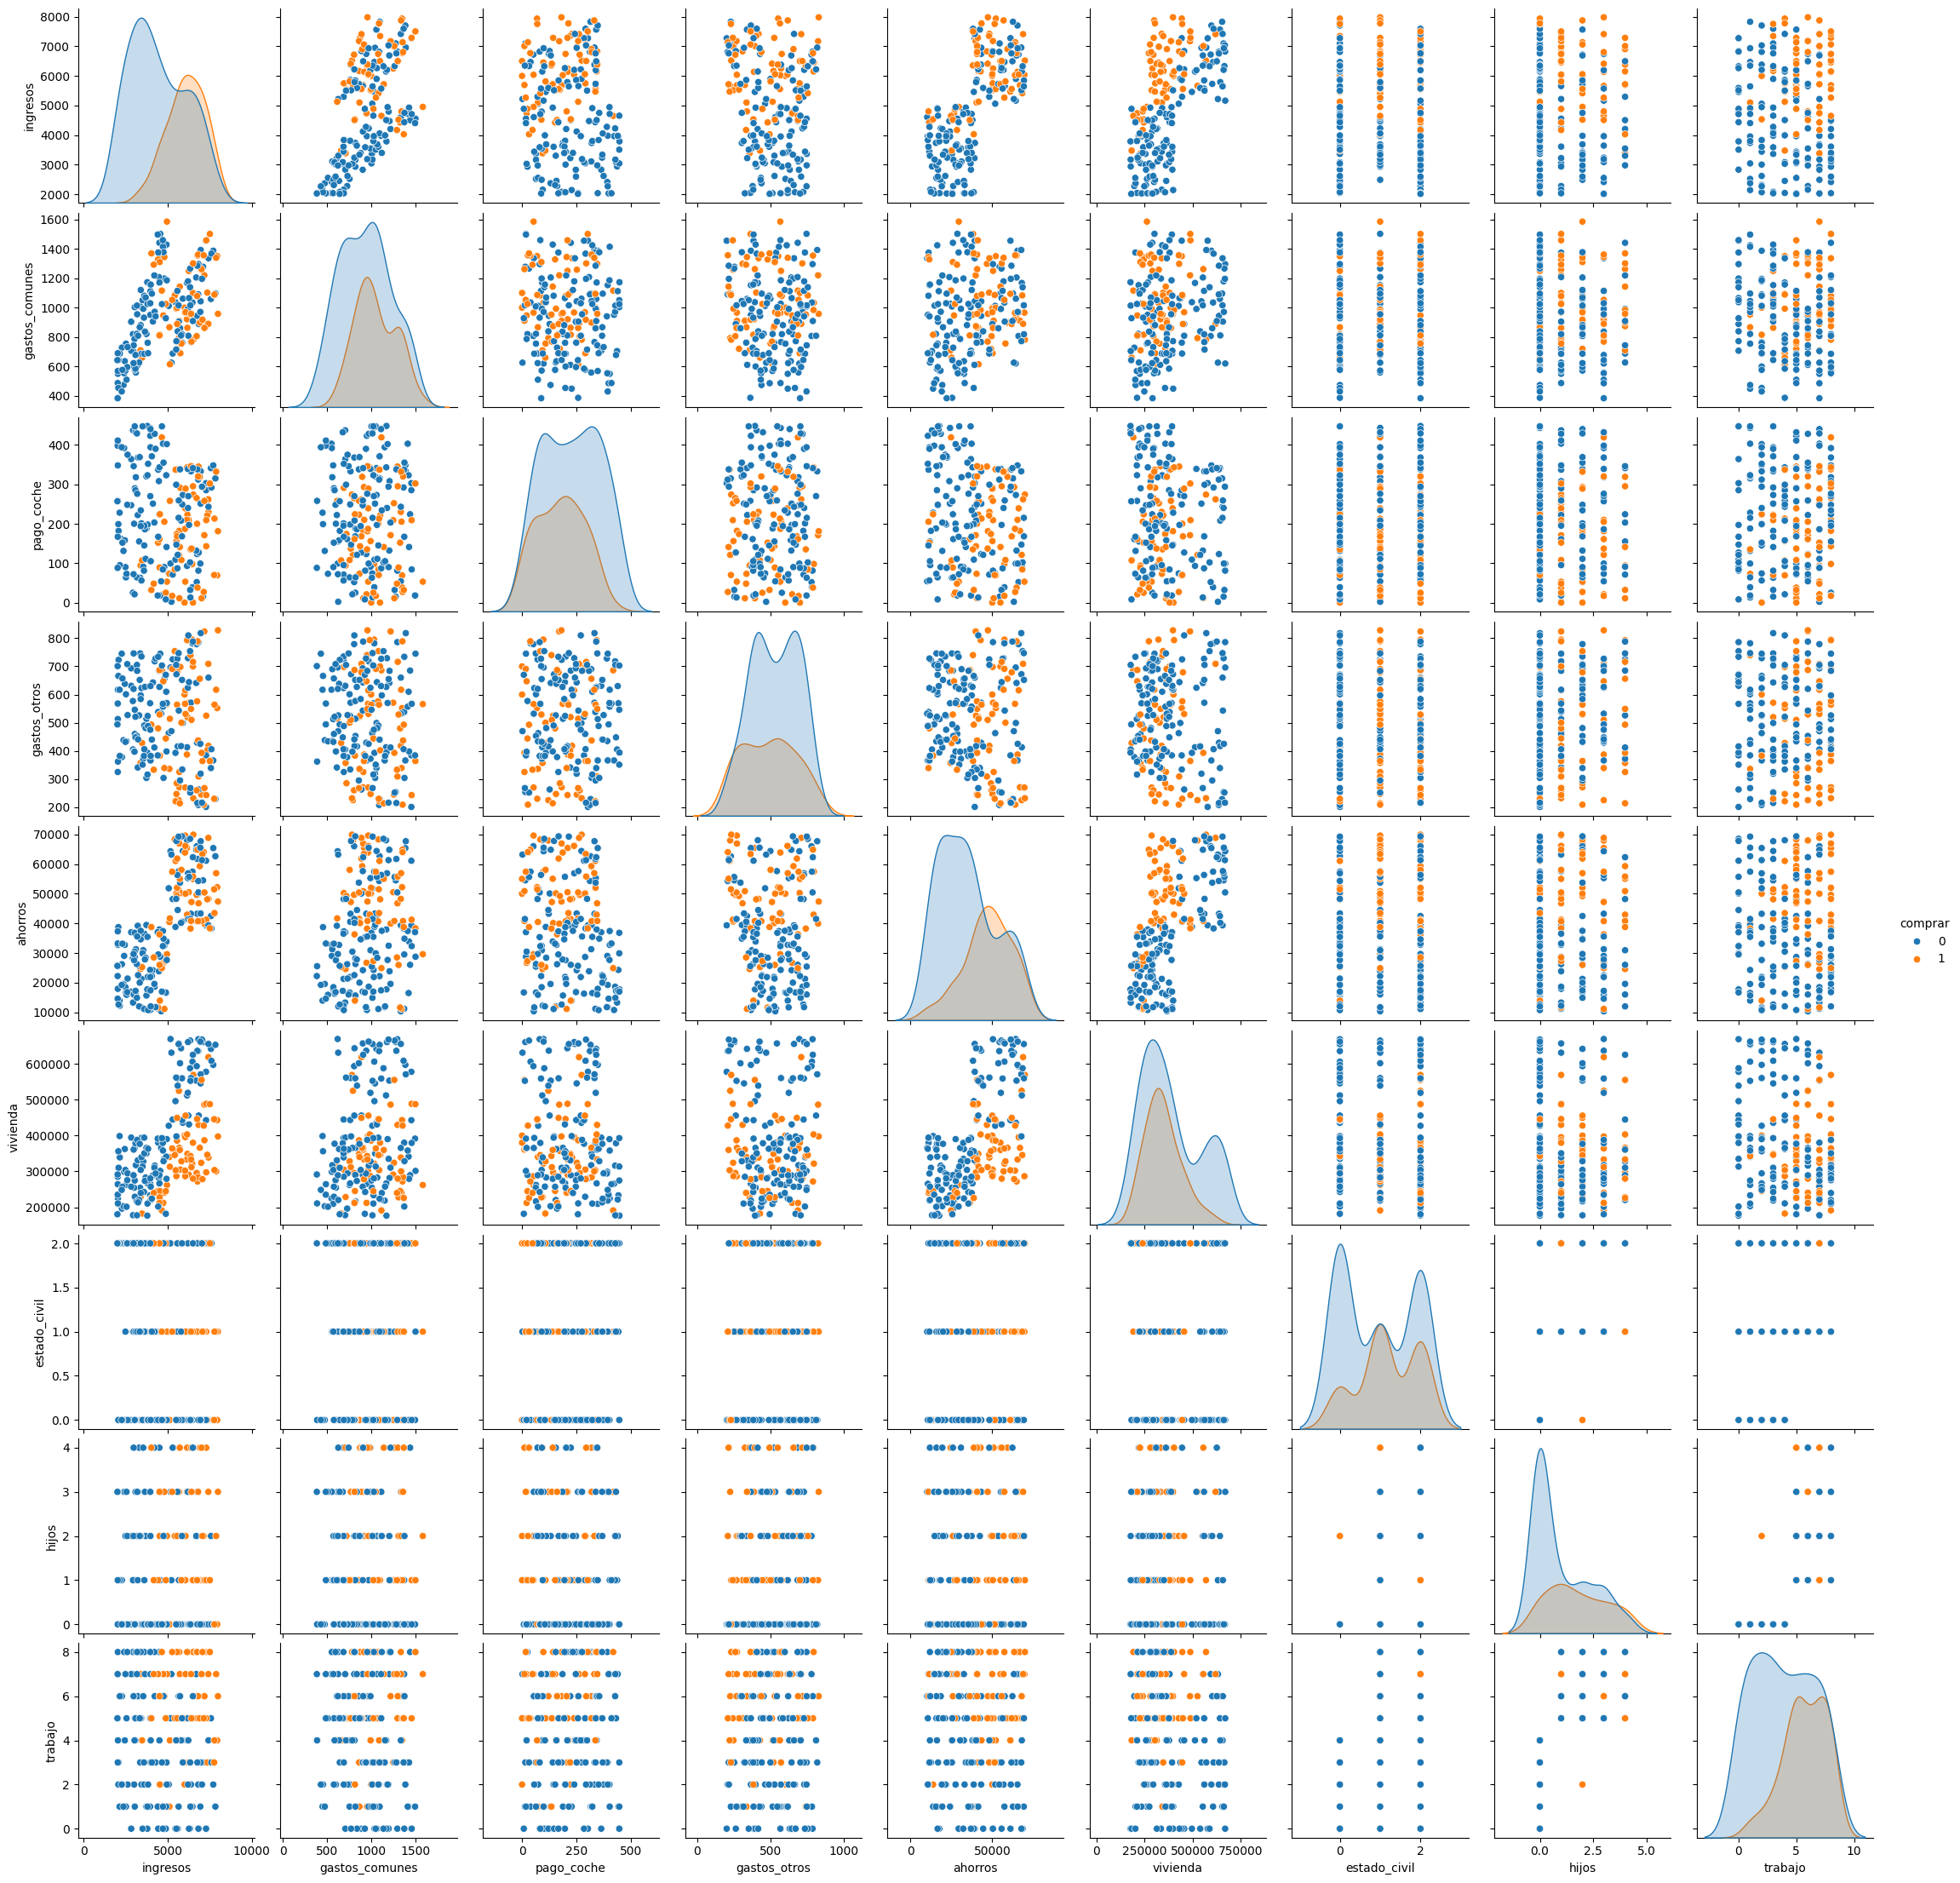

In [ ]:

# hago un pairplot con hue 'comprar'

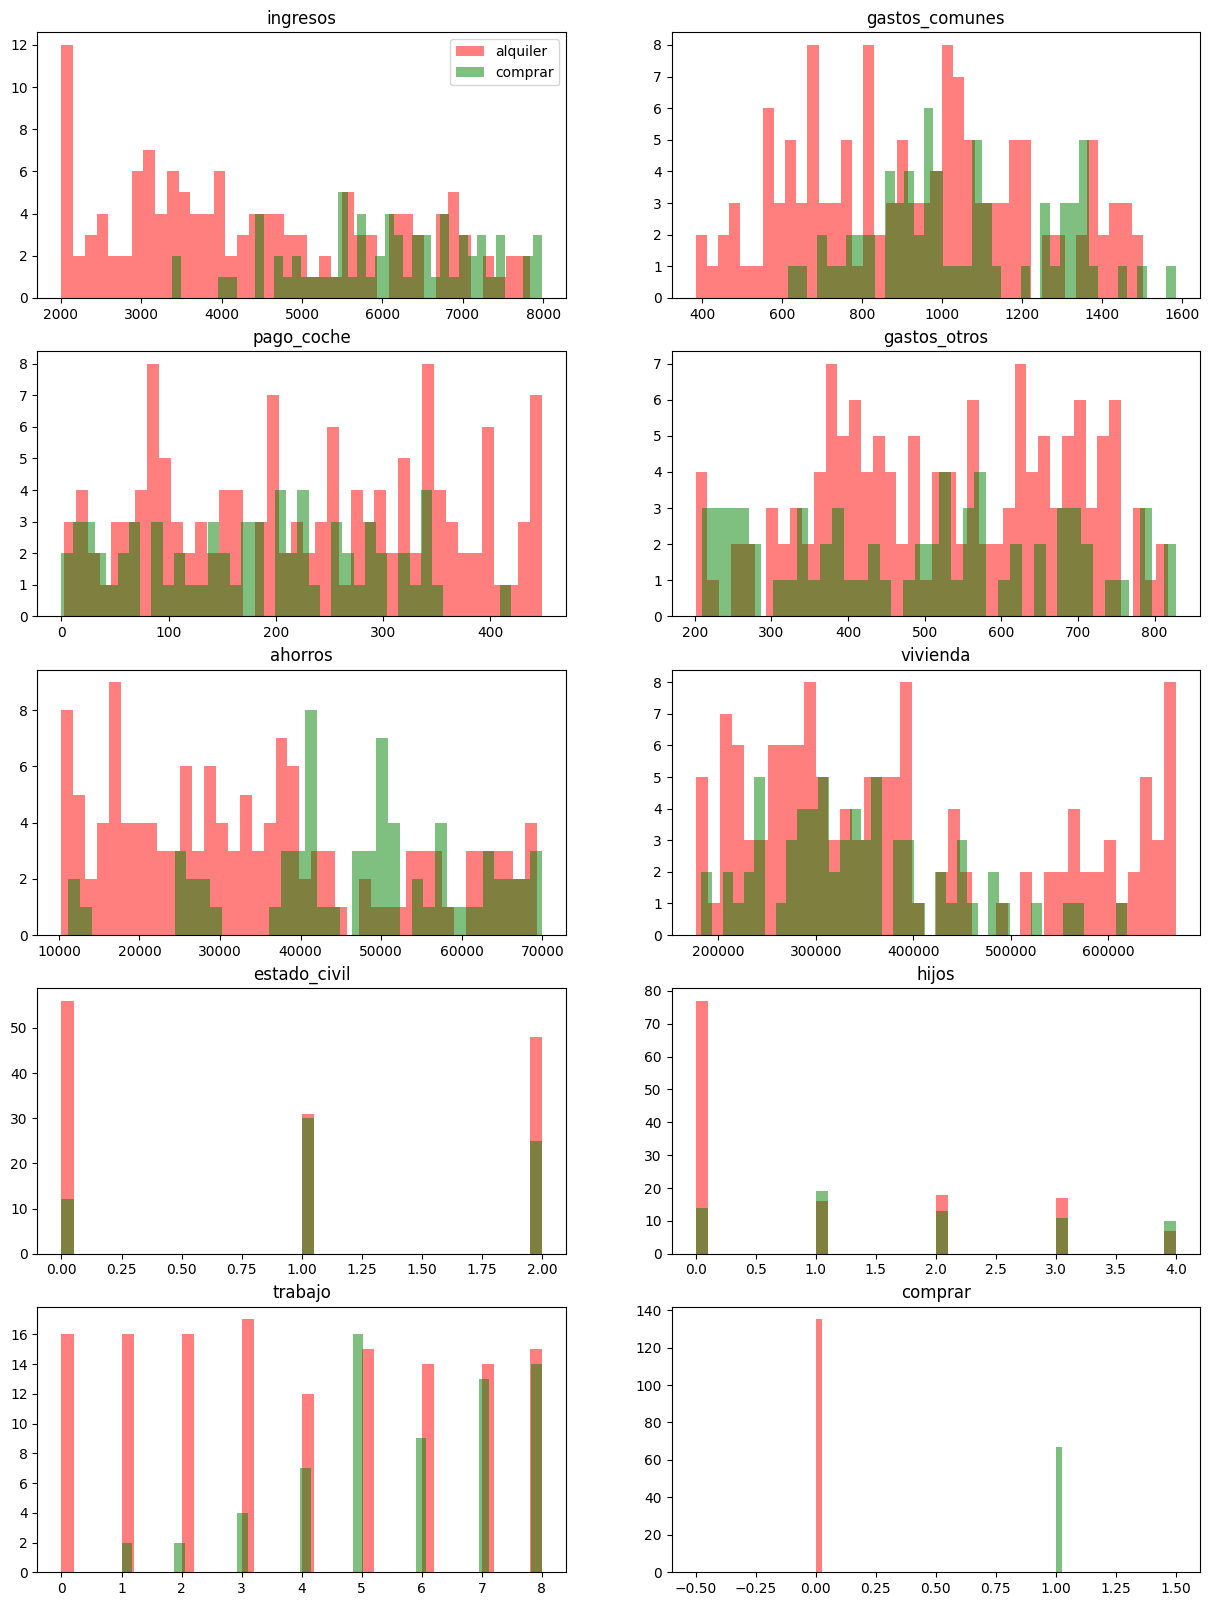

In [11]:
fig, axis = plt.subplots(5,2, figsize=(15,20))

alquiler = df[df['comprar']==0] 
comprar = df[df['comprar']==1] 

axes = axis.ravel()
for i in range(len(df.columns)):
    axes[i].hist(alquiler.values[:,i], bins=40, color = 'r', alpha=0.5)
    axes[i].hist(comprar.values[:,i], bins=40, color = 'g', alpha=0.5)
    axes[i].set_title(df.columns[i])

axes[0].legend(["alquiler", "comprar"])

<Axes: >

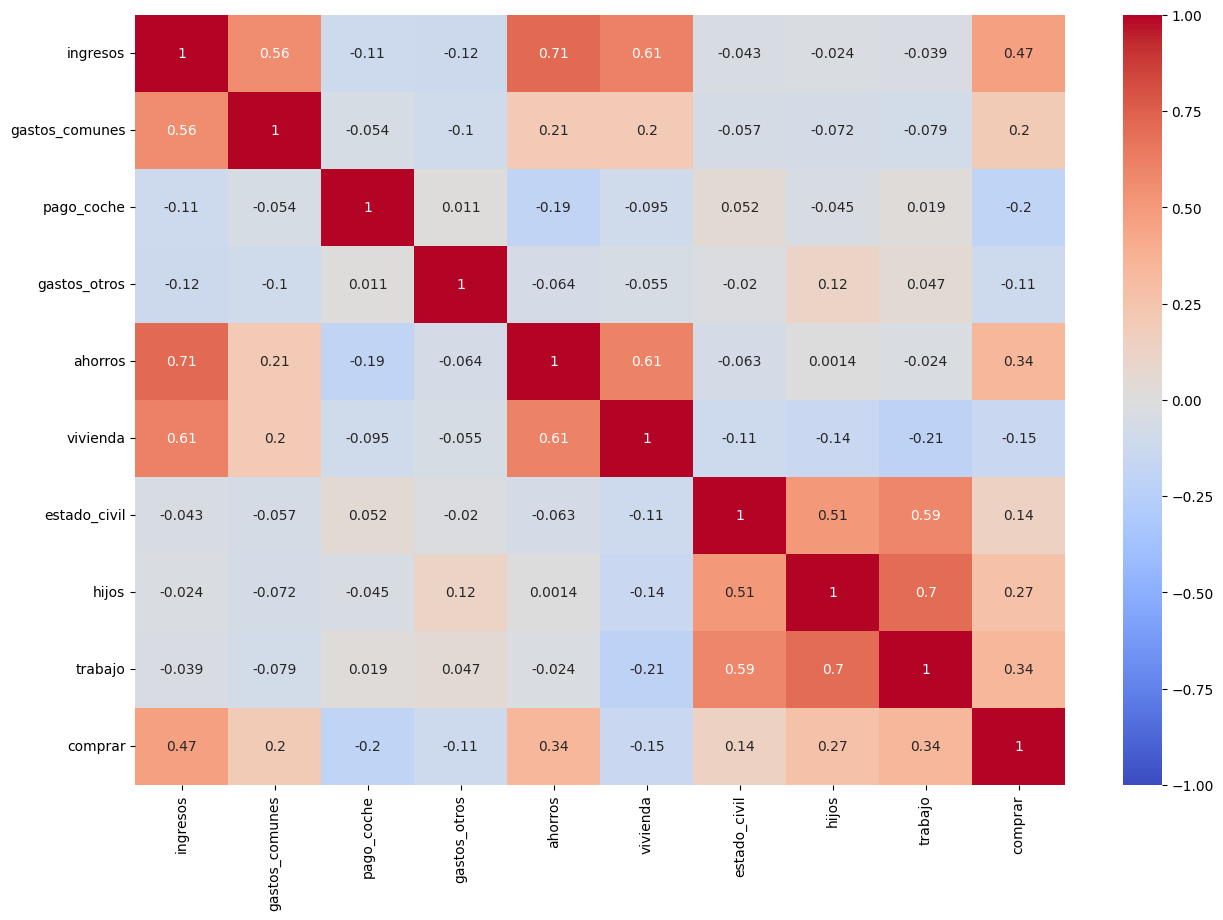

In [ ]:


# heatmap de la correlación con anotaciones, color map 'coolwarm'

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [ ]:


# X son todas las predictoras (comprar, no)
# el target es 'comprar'

In [ ]:


# standardscaler y hacemos un fit transform para estandarizar los datos

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [ ]:


# una PCA con 9 componentes
# transformamos a partir de X estandarizada

array([[ 1.32191526, -0.22295045,  1.59986259, ...,  0.31803061,
        -0.75180934,  0.26998397],
       [ 1.14787775,  1.7169673 ,  0.39572194, ...,  1.54248744,
         0.22179854,  0.43842516],
       [ 0.09036864,  1.83606627,  1.35938166, ..., -1.54049502,
         0.66811958,  0.15346276],
       ...,
       [-1.48146407,  0.9759    ,  0.63757791, ...,  0.66224764,
         0.43775508, -0.79636925],
       [-1.51463264, -0.39217592,  0.00570993, ...,  0.82004012,
         0.05571045, -0.14376766],
       [-0.35346394, -1.72020938, -0.60988792, ...,  0.3963229 ,
         0.73154396,  0.18661762]], shape=(202, 9))

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [ ]:

# cuánta varianza explica cada componente principal

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [ ]:

# varianza acumulada

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621,
       0.90870487, 0.95016066, 0.98033885, 1.        ])

In [ ]:

# las 5 primeras componentes principales, ¿cuánta varianza explican?

np.float64(0.8524062117714313)

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

Text(0, 0.5, 'Ratio varianza acumulada')

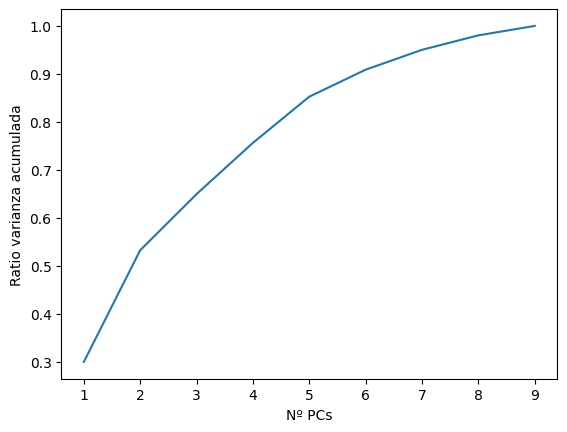

In [ ]:
# varianza acumulada hasta 9 componentes

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

In [ ]:
# las combinaciones lineales que dan lugar a las componentes tranformadas

array([[ 4.93720326e-01,  3.18228652e-01, -1.23770585e-01,
        -1.11875722e-01,  4.44650306e-01,  4.62608605e-01,
        -2.52278902e-01, -2.59858682e-01, -2.90247540e-01],
       [ 3.06958523e-01,  1.47372634e-01, -9.16409584e-02,
         1.11593405e-04,  2.88434882e-01,  1.48984886e-01,
         4.69043960e-01,  5.21893872e-01,  5.27155638e-01],
       [-9.14192492e-02, -3.63453156e-01, -5.16144106e-01,
         7.01985912e-01,  1.91767355e-01,  1.40513292e-01,
        -1.72884784e-01,  1.12183561e-01, -3.69101842e-02],
       [ 1.11222044e-01,  8.16296251e-02,  7.80267686e-01,
         5.90704378e-01,  2.28391302e-02,  1.50085403e-01,
        -7.66309571e-03,  7.40404830e-03, -7.49271067e-03],
       [ 8.88965452e-02,  7.63005855e-01, -2.65553621e-01,
         3.30743735e-01, -2.89002223e-01, -3.65555555e-01,
        -1.04638865e-01,  4.36678973e-02,  8.65473020e-06],
       [-7.54772584e-02,  6.79027972e-02, -1.53696523e-01,
         1.54422329e-01, -2.30180519e-01,  2.907985

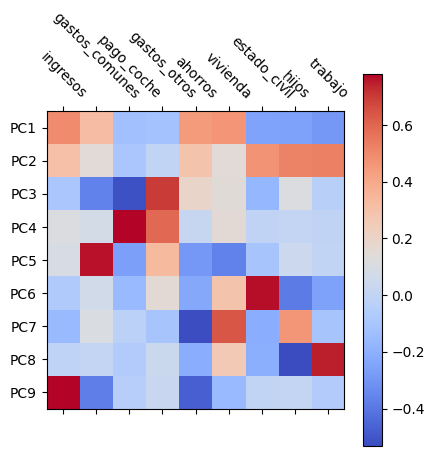

In [ ]:


# usando un matshow pintamos la relación entre las componentes de la PCA y los ejes originales

In [ ]:

# la misma información pero en un dataframe

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
PC1,0.493720,0.318229,-0.123771,-0.111876,0.444650,0.462609,-0.252279,-0.259859,-0.290248
PC2,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
PC3,-0.091419,-0.363453,-0.516144,0.701986,0.191767,0.140513,-0.172885,0.112184,-0.036910
PC4,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
PC5,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009
PC6,-0.075477,0.067903,-0.153697,0.154422,-0.230181,0.290799,0.767070,-0.387964,-0.256446
PC7,-0.154319,0.105598,-0.027333,-0.101876,-0.524584,0.641034,-0.212365,0.460067,-0.105053
PC8,-0.012732,0.010274,-0.061759,0.037977,-0.212759,0.260847,-0.204816,-0.532216,0.745630
PC9,0.776990,-0.374440,-0.048557,0.026631,-0.474168,-0.156101,-0.003289,0.011051,-0.060657


## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [ ]:


# train_test_split con 20% para test y semilla 42
# miro el shape de X train, X test, y train, y test

(161, 9)
(41, 9)
(161,)
(41,)


In [ ]:


# pipeline con los pasos que se muestran en la figura de abajo
# Select k best con todas
# pca con 5 componentes
# random forest con max_depth 5, aunque max_depth no es muy necesario con el randomforest

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k='all')),
                ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [ ]:
# entreno el pipeline con train

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k='all')),
                ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [ ]:


# predigo con el pipeline en test
# calculo el accuracy en test
# calculo ma latriz de confusión en test

accuracy_score 0.7560975609756098
confusion_matrix
 [[21  3]
 [ 7 10]]


In [ ]:


# import LogisticRegression y SVM

In [28]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k='all')),
                ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [ ]:
# probamos esta combinación de hiperparámetros, a ver qué tal salen las métricas
# si tenéis tiempo, podéis probar otras combinaciones, por si mejorasen

params_rf = {
    'scaler': [StandardScaler(), 'passthrough'],
    'feature_selection__k': [5,7,'all'],
    'pca__n_components': np.arange(1,5),
    'classifier__max_depth': np.arange(2,7)
}

params_log = {
    'scaler': [StandardScaler(), 'passthrough'],
    'feature_selection__k': [5,7,'all'],
    'pca__n_components': np.arange(1,5),
    'classifier': [LogisticRegression()],
    'classifier__C': [0.1,1,10]
}


params_svm = {
    'scaler': [StandardScaler(), 'passthrough'],
    'feature_selection__k': [5,7,'all'],
    'pca__n_components': np.arange(1,5),
    'classifier': [SVC()],
    'classifier__C': [0.1,1,10],
    'classifier__kernel': ['linear','rbf']
}

In [40]:
search_space= [
    params_rf,
    params_log,
    params_svm
]

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# gs = GridSearchCV(pipe, search_space, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

gs = RandomizedSearchCV(pipe, search_space, cv=3, n_iter=100, scoring="accuracy", n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('feature_selection',
                                              SelectKBest(k='all')),
                                             ('pca', PCA(n_components=5)),
                                             ('classifier',
                                              RandomForestClassifier(max_depth=5))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'classifier__max_depth': array([2, 3, 4, 5, 6]),
                                         'feature_selection__k': [5, 7, 'all'],
                                         'pca__n_components': array([...
                                         'classifier__C': [0.1, 1, 10],
                                         'feature_selection__k': [5, 7, 'all'],
                                         'pca__n_components': array([1, 2, 3, 4]),
                                         'scaler': [StandardScaler(),
                                                    'passthrough']},
                                        {'classifier': [SVC()],
                                         'classifier__C': [0.1, 1, 10],
                                         'classifier__kernel': ['linear',
                                                                'rbf'],
                                         'feature_selection__k': [5, 7, 'all'],
                                         'pca__n_components': array([1, 2, 3, 4]),
                                         'scaler': [StandardScaler(),
                                                    'passthrough']}],
                   scoring='accuracy', verbose=1)

In [43]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'scaler': 'passthrough', 'pca__n_components': np.int64(3), 'feature_selection__k': 'all', 'classifier__kernel': 'linear', 'classifier__C': 10, 'classifier': SVC()}
0.9067085953878408
Pipeline(steps=[('scaler', 'passthrough'),
                ('feature_selection', SelectKBest(k='all')),
                ('pca', PCA(n_components=np.int64(3))),
                ('classifier', SVC(C=10, kernel='linear'))])


In [44]:
final_model = gs.best_estimator_.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.7804878048780488
confusion_matrix
 [[21  3]
 [ 6 11]]


In [45]:
final_model

Pipeline(steps=[('scaler', 'passthrough'),
                ('feature_selection', SelectKBest(k='all')),
                ('pca', PCA(n_components=np.int64(3))),
                ('classifier', SVC(C=10, kernel='linear'))])

In [46]:
import pickle

In [47]:
pickle.dump(final_model, open("final_model.pkl", 'wb'))

In [48]:
modelo_importado = pickle.load(open('final_model.pkl', 'rb'))
modelo_importado

Pipeline(steps=[('scaler', 'passthrough'),
                ('feature_selection', SelectKBest(k='all')),
                ('pca', PCA(n_components=np.int64(3))),
                ('classifier', SVC(C=10, kernel='linear'))])